In [1]:
import pandas as pd

surveys_df = pd.read_csv('data/surveys.csv')

In [2]:
surveys_df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [3]:
surveys_df.dtypes

record_id            int64
month                int64
day                  int64
year                 int64
plot_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object

In [4]:
surveys_df.columns
surveys_df.shape
surveys_df.head(6)
surveys_df.tail(3)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0
35548,35549,12,31,2002,5,NaN,NaN,NaN,NaN


In [5]:
pd.unique(surveys_df['species_id'])

array(['NL', 'DM', 'PF', 'PE', 'DS', 'PP', 'SH', 'OT', 'DO', 'OX', 'SS',
       'OL', 'RM', nan, 'SA', 'PM', 'AH', 'DX', 'AB', 'CB', 'CM', 'CQ',
       'RF', 'PC', 'PG', 'PH', 'PU', 'CV', 'UR', 'UP', 'ZL', 'UL', 'CS',
       'SC', 'BA', 'SF', 'RO', 'AS', 'SO', 'PI', 'ST', 'CU', 'SU', 'RX',
       'PB', 'PL', 'PX', 'CT', 'US'], dtype=object)

In [6]:
site_names = pd.unique(surveys_df['plot_id'])
len(site_names)
surveys_df['plot_id'].nunique()


24

In [7]:
species_ids = pd.unique(surveys_df['species_id'])
len(species_ids)

49

In [8]:
surveys_df['species_id'].nunique()

48

Why does `surveys_df['species_id'].nunique()` report 48 species while `len(species_ids)` returns 49? guessing NA values are dropped in `nunique()`?

In [9]:
species_ids

array(['NL', 'DM', 'PF', 'PE', 'DS', 'PP', 'SH', 'OT', 'DO', 'OX', 'SS',
       'OL', 'RM', nan, 'SA', 'PM', 'AH', 'DX', 'AB', 'CB', 'CM', 'CQ',
       'RF', 'PC', 'PG', 'PH', 'PU', 'CV', 'UR', 'UP', 'ZL', 'UL', 'CS',
       'SC', 'BA', 'SF', 'RO', 'AS', 'SO', 'PI', 'ST', 'CU', 'SU', 'RX',
       'PB', 'PL', 'PX', 'CT', 'US'], dtype=object)

In [10]:
surveys_df['species_id'].nunique()

48

In [11]:
x = surveys_df.describe()
gp_data = surveys_df.groupby('sex')
y = gp_data['weight'].describe()
x.shape
y.shape

(2, 8)

In [12]:
x = gp_data.mean(numeric_only = True)
x.shape

(2, 7)

In [13]:
# surveys_df.columns
# gp_data.columns    # why does a grouped data frame have no columns attribute like an ungrouped one?

In [14]:
surveys_df.dtypes

record_id            int64
month                int64
day                  int64
year                 int64
plot_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object

how many recorded individuals are female vs male?

In [15]:
gp_sex_df = surveys_df.groupby('sex')
gp_sex_df['sex'].count()

sex
F    15690
M    17348
Name: sex, dtype: int64

In [16]:
grouped_data2 = surveys_df.groupby(['plot_id', 'sex'])
grouped_data2.mean(numeric_only=True)

record_id     month        day         year  hindfoot_length  \
plot_id sex                                                                    
1       F    18390.384434  6.597877  15.338443  1990.933962        31.733911   
        M    17197.740639  6.121461  15.905936  1990.091324        34.302770   
2       F    17714.753608  6.426804  16.288660  1990.449485        30.161220   
        M    18085.458042  6.340035  15.440559  1990.756119        30.353760   
3       F    19888.783875  6.610302  15.993281  1992.013438        23.774044   
        M    20226.767857  6.277381  16.271429  1992.275000        23.833744   
4       F    17489.205275  6.447248  15.608945  1990.235092        33.249102   
        M    18493.841748  6.436893  16.303883  1991.000971        34.097959   
5       F    12280.793169  6.142315  15.722960  1986.485769        28.921844   
        M    12798.426621  6.194539  15.703072  1986.817406        29.694794   
6       F    19406.503392  6.640434  15.947083  1991.579376        26.981322   
        M    17849.574607  6.043194  15.856021  1990.556283        27.425591   
7       F    19069.668657  6.385075  15.313433  1991.441791        19.779553   
        M    19188.729642  6.719870  15.778502  1991.462541        20.536667   
8       F    18920.276190  6.644048  15.479762  1991.267857        32.187578   
        M    19452.109868  6.585961  15.427263  1991.686673        33.751059   
9       F    16217.497069  6.507620  15.309496  1989.303634        35.126092   
        M    18000.710159  6.369522  14.970120  1990.632470        34.175732   
10      F    16001.496454  5.588652  16.964539  1989.248227        18.641791   
        M    15708.704225  5.718310  16.739437  1989.007042        19.567164   
11      F    16994.962287  6.770073  15.954988  1989.836983        32.029299   
        M    16933.909621  6.379981  15.799806  1989.856171        32.078014   
12      F    17457.966981  6.509434  16.305660  1990.266981        30.975124   
        M    17592.327500  6.304167  16.367500  1990.400833        31.762489   
13      F    18033.100318  6.815287  15.847134  1990.619427        27.201014   
        M    16969.044700  6.485313  15.851852  1989.911877        27.893793   
14      F    17097.145275  6.519041  16.427362  1989.974612        32.973373   
        M    17891.948598  6.666355  16.336449  1990.587850        32.961802   
15      F    20602.449064  6.582121  15.787942  1992.523909        21.949891   
        M    18104.019560  6.193154  17.193154  1990.770171        21.803109   
16      F    19002.445946  6.369369  16.549550  1991.351351        23.144928   
        M    18434.714286  6.208791  16.402930  1990.926740        23.480916   
17      F    18234.322870  6.650224  15.892377  1990.785874        30.918536   
        M    18857.651472  6.569801  16.183286  1991.331434        32.227634   
18      F    17940.875497  6.698013  15.960265  1990.536424        26.690341   
        M    15106.718850  6.610224  16.797125  1988.551118        27.703072   
19      F    21848.216475  6.701149  15.226054  1993.417625        21.257937   
        M    19470.779690  6.533563  16.647160  1991.740103        21.071685   
20      F    17510.769231  6.743077  16.026154  1990.253846        27.069193   
        M    16076.192496  6.489396  16.375204  1989.243067        27.908451   
21      F    22452.636661  6.860884  16.307692  1993.878887        22.366554   
        M    20120.399113  6.671840  16.203991  1992.199557        21.736721   
22      F    18499.695976  6.651267  15.521610  1990.973174        34.108320   
        M    18015.365527  6.381872  16.682021  1990.650817        33.359746   
23      F    15863.193939  6.860606  16.036364  1989.024242        20.051948   
        M    17091.338164  6.391304  16.077295  1989.961353        19.850000   
24      F    13702.224280  6.596708  16.393004  1987.485597        26.993377   
        M    15208.136082  6.360825  16.971134  1988.641237        25.786996   

               

In [17]:
gp_site = surveys_df.groupby(['plot_id', 'sex'])
gp_site['weight'].mean()

plot_id  sex
1        F      46.311138
         M      55.950560
2        F      52.561845
         M      51.391382
3        F      31.215349
         M      34.163241
4        F      46.818824
         M      48.888119
5        F      40.974806
         M      40.708551
6        F      36.352288
         M      36.867388
7        F      20.006135
         M      21.194719
8        F      45.623011
         M      49.641372
9        F      53.618469
         M      49.519309
10       F      17.094203
         M      19.971223
11       F      43.515075
         M      43.366197
12       F      49.831731
         M      48.909710
13       F      40.524590
         M      40.097754
14       F      47.355491
         M      45.159378
15       F      26.670236
         M      27.523691
16       F      25.810427
         M      23.811321
17       F      48.176201
         M      47.558853
18       F      36.963514
         M      43.546952
19       F      21.978599
         M      20.306878

In [18]:
species_counts = surveys_df.groupby('species_id')['record_id'].count()
print(species_counts)

species_id
AB      303
AH      437
AS        2
BA       46
CB       50
CM       13
CQ       16
CS        1
CT        1
CU        1
CV        1
DM    10596
DO     3027
DS     2504
DX       40
NL     1252
OL     1006
OT     2249
OX       12
PB     2891
PC       39
PE     1299
PF     1597
PG        8
PH       32
PI        9
PL       36
PM      899
PP     3123
PU        5
PX        6
RF       75
RM     2609
RO        8
RX        2
SA       75
SC        1
SF       43
SH      147
SO       43
SS      248
ST        1
SU        5
UL        4
UP        8
UR       10
US        4
ZL        2
Name: record_id, dtype: int64


<Axes: xlabel='species_id'>

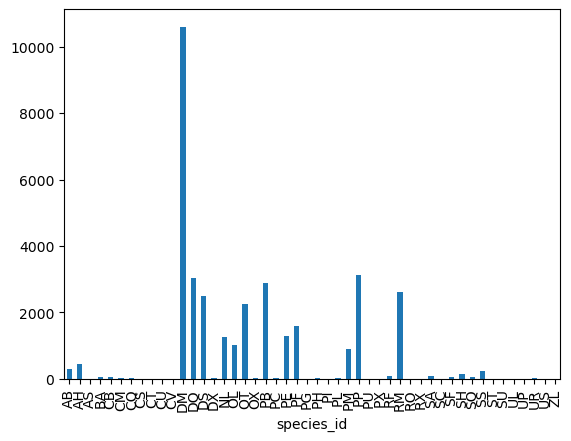

In [19]:
%matplotlib inline

species_counts.plot(kind = 'bar')

<Axes: xlabel='plot_id'>

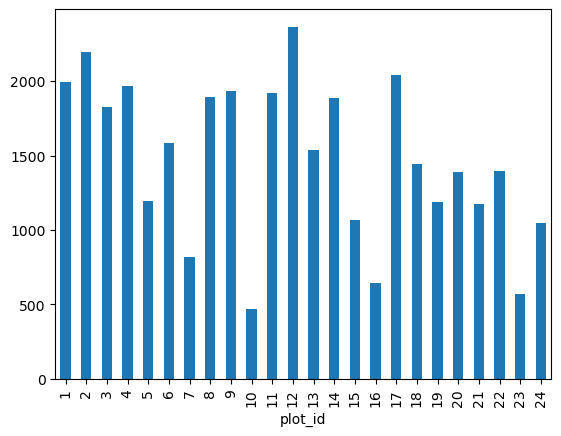

In [20]:
total_count = surveys_df.groupby('plot_id')['record_id'].count()
total_count.plot(kind = 'bar')

<Axes: xlabel='plot_id'>

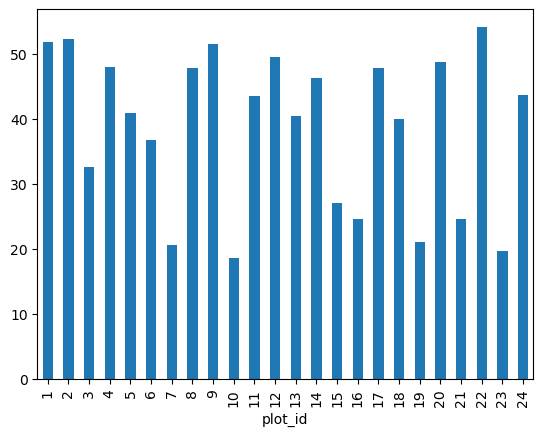

In [21]:
plot_wt_means = surveys_df.groupby('plot_id')['weight'].mean()
plot_wt_means.plot(kind = 'bar')

<Axes: xlabel='sex'>

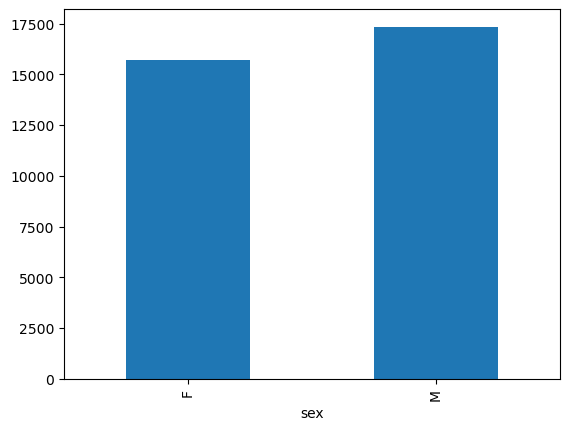

In [22]:
surveys_df.groupby('sex').count()['record_id'].plot(kind = 'bar')

In [23]:
surveys_df.groupby('species_id')['record_id'].count()

species_id
AB      303
AH      437
AS        2
BA       46
CB       50
CM       13
CQ       16
CS        1
CT        1
CU        1
CV        1
DM    10596
DO     3027
DS     2504
DX       40
NL     1252
OL     1006
OT     2249
OX       12
PB     2891
PC       39
PE     1299
PF     1597
PG        8
PH       32
PI        9
PL       36
PM      899
PP     3123
PU        5
PX        6
RF       75
RM     2609
RO        8
RX        2
SA       75
SC        1
SF       43
SH      147
SO       43
SS      248
ST        1
SU        5
UL        4
UP        8
UR       10
US        4
ZL        2
Name: record_id, dtype: int64

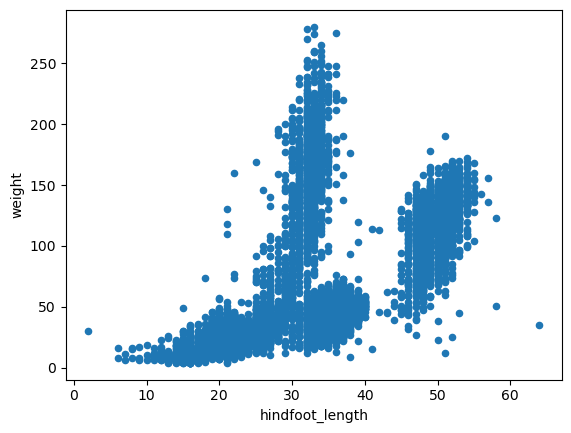

In [24]:
import matplotlib.pyplot as plt
import numpy as np

surveys = pd.read_csv('data/surveys.csv')
my_plot = surveys.plot('hindfoot_length', 'weight', kind = 'scatter')


(array([  9.,  38., 108., 205., 245., 224., 109.,  39.,  18.,   5.]),
 array([-0.29829923, -0.23393955, -0.16957987, -0.10522018, -0.0408605 ,
         0.02349918,  0.08785886,  0.15221854,  0.21657822,  0.28093791,
         0.34529759]),
 <BarContainer object of 10 artists>)

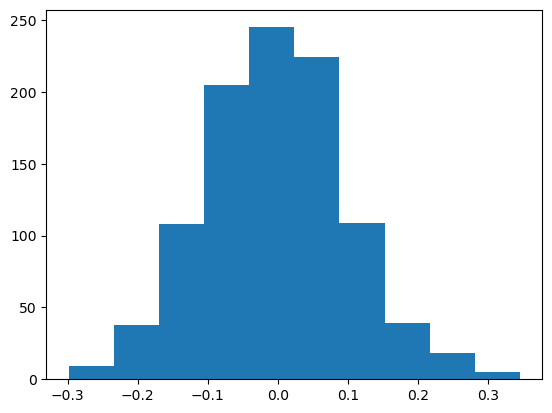

In [25]:
sample_data = np.random.normal(0, .1, 1000)

plt.hist(sample_data)

Text(0.5, 0, 'value')

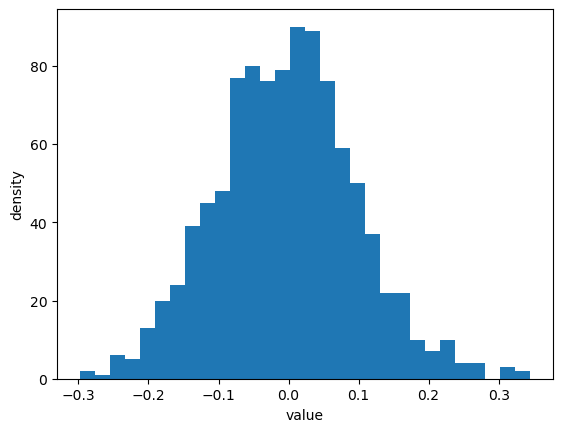

In [27]:
fig, ax = plt.subplots()
ax.hist(sample_data, 30)
ax.set_ylabel('density')
ax.set_xlabel('value')


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.22963707, -0.12963707, -0.02963707,  0.07036293,  0.17036293,
         0.27036293,  0.37036293,  0.47036293,  0.57036293,  0.67036293,
         0.77036293]),
 <BarContainer object of 10 artists>)

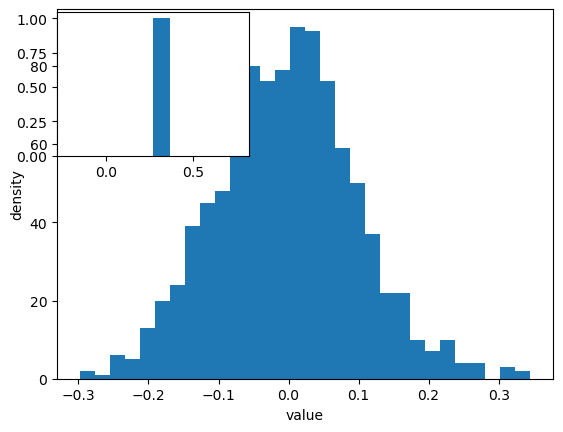

In [30]:
fig, ax1 = plt.subplots()
ax1.hist(sample_data, 30)
ax1.set_ylabel('density')
ax1.set_xlabel('value')
a = 5
b = 10
beta_draws = np.random.beta(a, b)
ax2 = fig.add_axes([0.125, .575, .3, .3])
ax2.hist(beta_draws)

Text(0.5, 0.98, 'Scatterplot of weight vs hindfoot length')

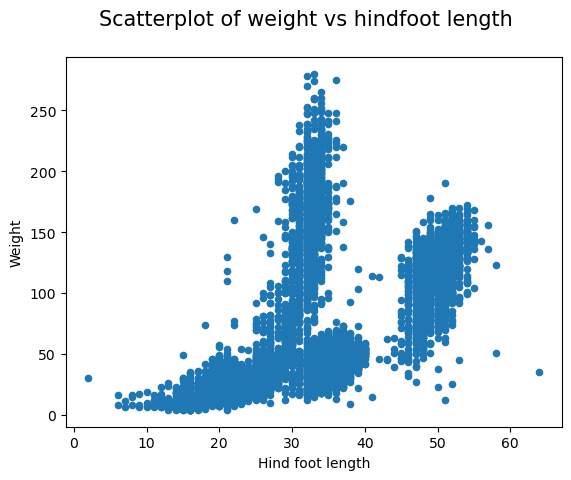

In [32]:
fig, ax1 = plt.subplots()
surveys.plot('hindfoot_length', 'weight', kind = 'scatter', ax = ax1)
ax1.set_xlabel('Hind foot length')
ax1.set_ylabel('Weight')
fig.suptitle('Scatterplot of weight vs hindfoot length', fontsize = 15)

In [39]:
import plotnine as p9

myplot = (p9.ggplot(data = surveys,
                     mapping = p9.aes(x = 'hindfoot_length', y = 'weight')) +
                p9.geom_point())

my_plt_version = myplot.draw()
# p9_ax = my_plt_version.axes[0]
# p9_ax.set_xlabel('Hindfoot length')
# p9_ax.tick_params(labelsize = 16, pad = 8)
# p9_ax.set_title('Scatterplot of wt vs hindfoot len', fontsize = 15)

plt.show()

c:\Users\casey\anaconda3\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 4811 rows containing missing values.
